In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [6]:
df = pd.read_csv('technical_support_data-2.csv')
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [7]:
df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [14]:
df.shape

(23, 8)

In [16]:
df_attrs = df.iloc[:,1:]

In [18]:
df_attrs_scaled = df_attrs.apply(zscore)
df_attrs_scaled.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


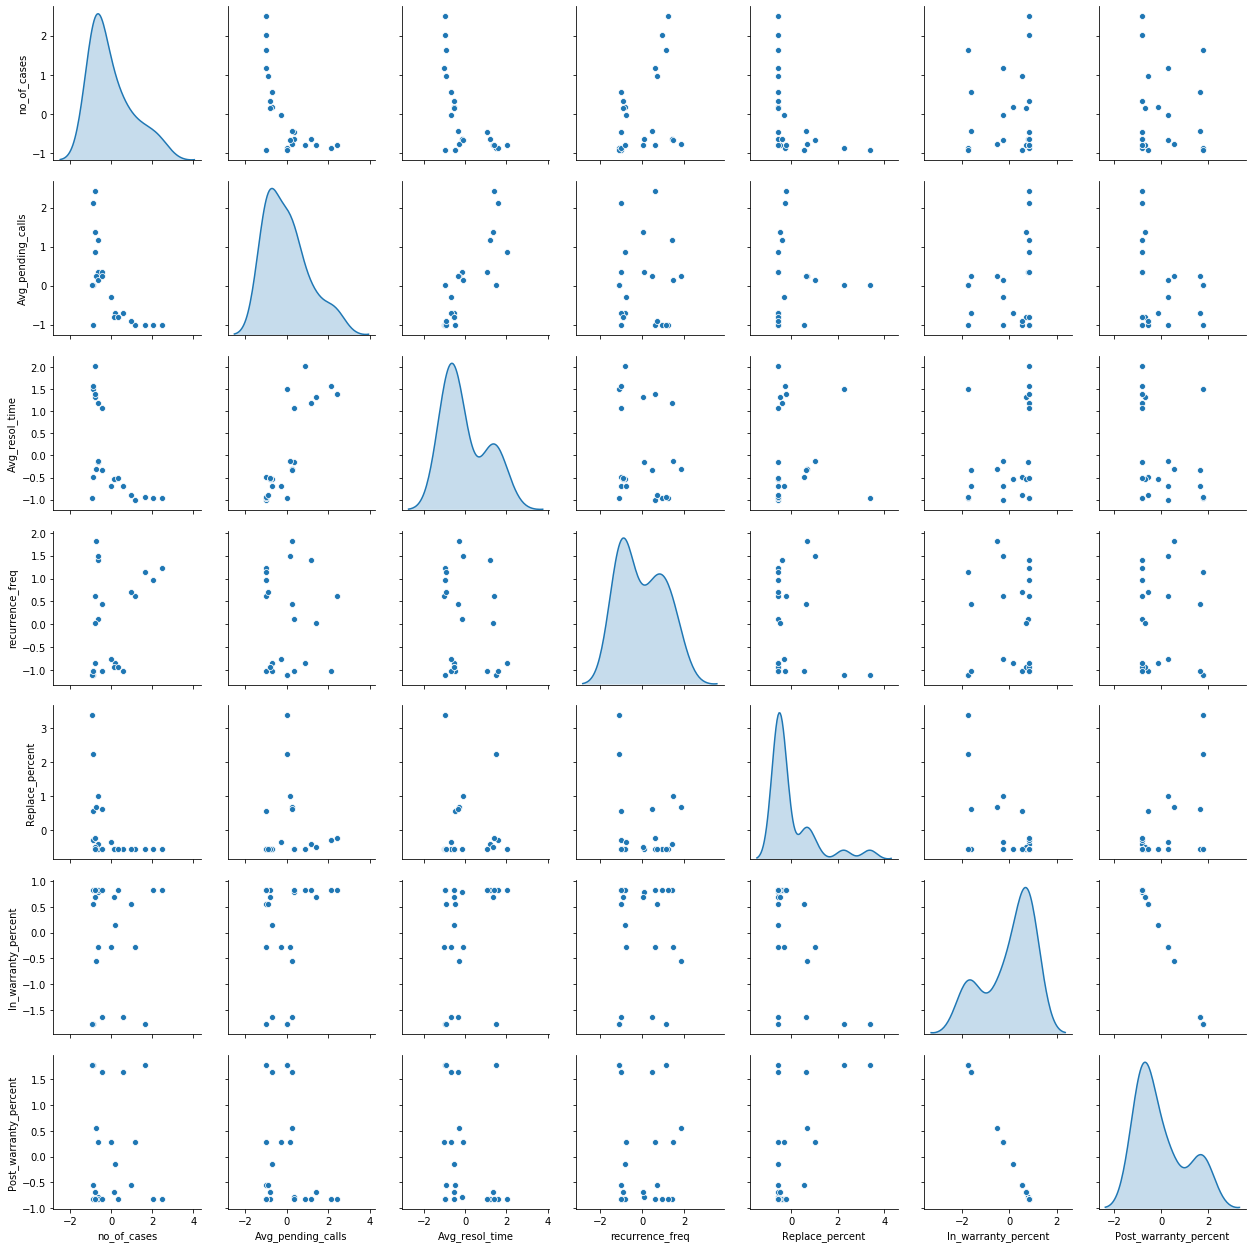

In [20]:
sns.pairplot(df_attrs_scaled, diag_kind='kde')

In [23]:
# finding optimal cluster
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

In [24]:
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_attrs_scaled)
    predict = model.predict(df_attrs_scaled)
    meanDistortions.append(sum(np.min(cdist(df_attrs_scaled, model.cluster_centers_), axis=1))/df_attrs_scaled.shape[0])

Text(0.5, 1.0, 'Elbow method')

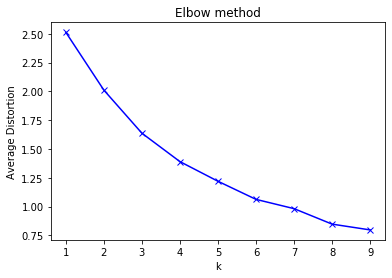

In [25]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow method')

In [35]:
# k =3
final_model = KMeans(3)
print(final_model.fit_transform(df_attrs_scaled))
final_model.fit(df_attrs_scaled)
prediction = final_model.predict(df_attrs_scaled)

df['GROUP'] = prediction
df.head()

[[1.0355858  2.90891939 3.00173086]
 [5.10375769 2.72250689 4.80237067]
 [2.12477961 3.19872352 3.14782968]
 [5.33588653 2.99193579 5.91339532]
 [1.97427245 3.46395291 1.64921128]
 [3.48675489 4.08541269 1.50663569]
 [4.20491235 4.63716281 1.33703788]
 [1.09164323 3.55124486 2.94153696]
 [1.3606903  2.82823452 4.0422121 ]
 [3.41290309 3.96937796 0.30180372]
 [4.27413253 4.54796047 1.42439209]
 [3.07333878 2.27792892 4.66501095]
 [1.09725471 3.73037079 2.98632206]
 [3.6948655  4.4236268  1.17607233]
 [1.81515635 4.29882312 4.28554457]
 [2.31331853 4.60601883 4.66906717]
 [3.49515156 2.84236231 5.47402416]
 [1.49942711 2.29243245 3.0218959 ]
 [2.6870489  3.93086    1.31073158]
 [0.90314884 3.48140134 3.55879936]
 [3.2064514  2.08538173 3.45050927]
 [2.95283307 2.04180929 3.14770762]
 [3.54074581 0.73819849 4.09589037]]


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [28]:
df_cluster = df.groupby(['GROUP'])
df_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,229.900000,1.280000,24.000000,0.128000,0.024000,86.900000,13.100000
1,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714
2,33.333333,3.300000,145.666667,0.121667,0.025000,99.166667,0.833333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1262458d0>,
      dtype=object)

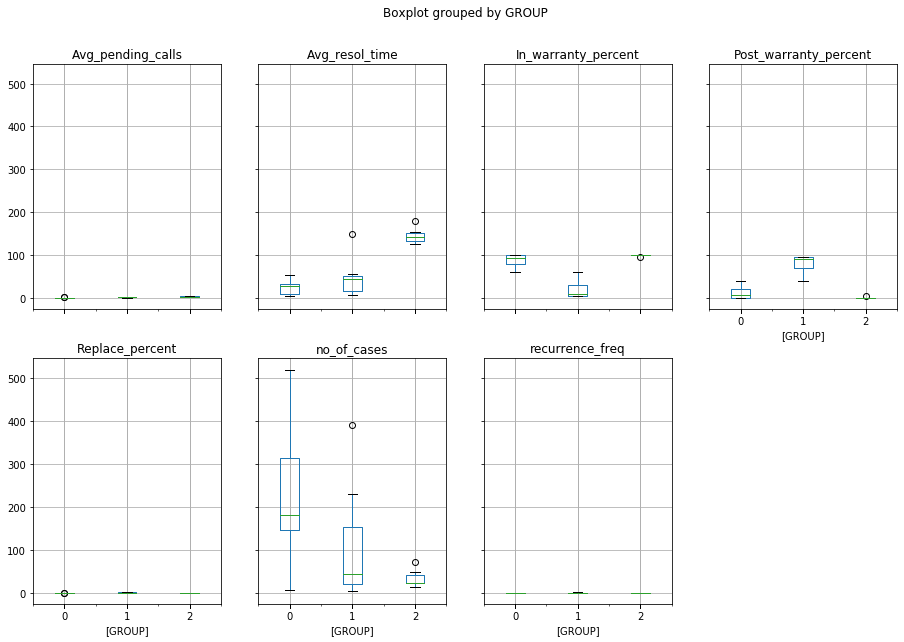

In [31]:
df.boxplot(by='GROUP', layout=(2,4), figsize=(15,10))

In [32]:
# k = 5
final_model = KMeans(n_clusters= 5)
final_model.fit(df_attrs_scaled)
predications = final_model.predict(df_attrs_scaled)
df['GROUP'] = predications
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,3
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,3
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [33]:
df_cluster = df.groupby('GROUP')
df_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,119.666667,1.450,34.833333,0.053333,0.040,86.500000,13.500000
1,154.000000,1.760,35.400000,0.228000,0.142,27.000000,73.000000
2,33.333333,3.300,145.666667,0.121667,0.025,99.166667,0.833333
3,7.500000,2.000,79.000000,0.010000,0.600,5.000000,95.000000
4,395.250000,1.025,7.750000,0.240000,0.000,87.500000,12.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126d1ccc0>,
      dtype=object)

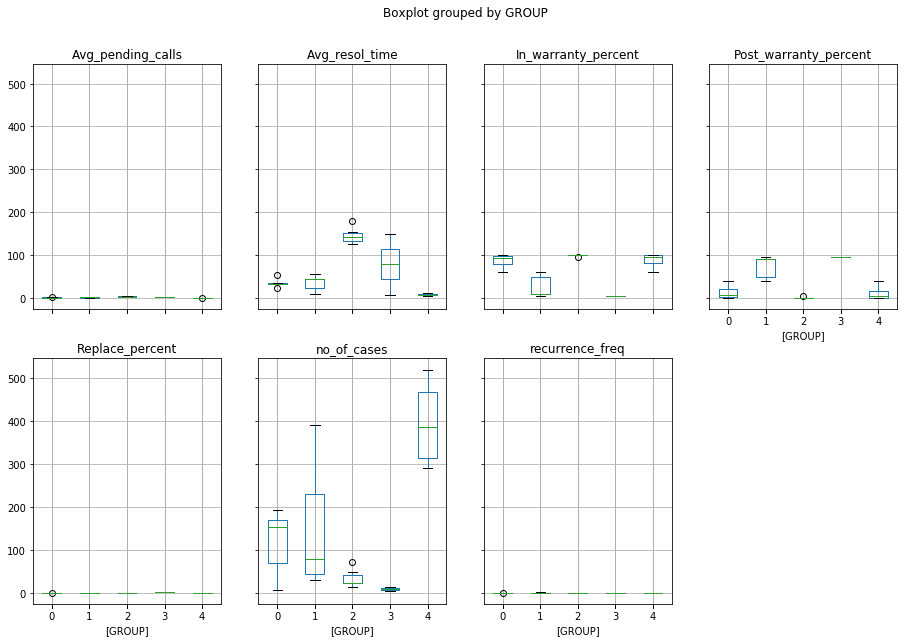

In [34]:
df.boxplot(by='GROUP', figsize=(15,10), layout=(2,4))